In [31]:
import autograd.numpy as np
import autograd.numpy.random as rnd
from autograd import elementwise_grad as egrad

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [53]:
x = np.linspace(-2, 2, 1000)

In [33]:
def f(x):
    return (x + 1)*(x + 1)*(x-1)*(x-2)

df = egrad(f)

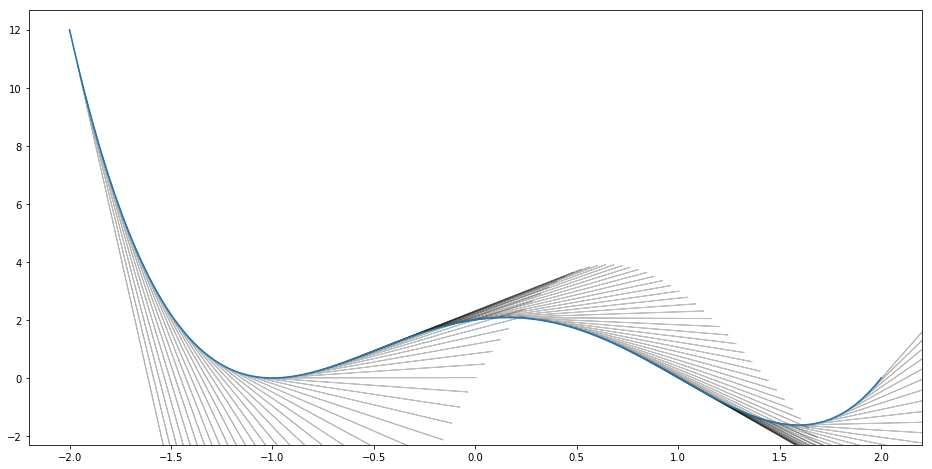

In [34]:
plt.figure(figsize=(16, 8))
y = f(x)
dy = df(x)
plt.plot(x, y)
for i in range(0, len(x), 10):
    plt.arrow(x[i], y[i], 1, dy[i], fc='k', ec='k', alpha=0.25)

In [35]:
def optimise(iterations, lr=0.01):
    
    x = [None]*iterations
    x[0] = -3.0
    converged = False
    for i in range(iterations-1):
        x[i+1] = x[i] - lr* df(x[i])
        
        if np.abs(df(x[i])) < 1e-6:
            break
    return x

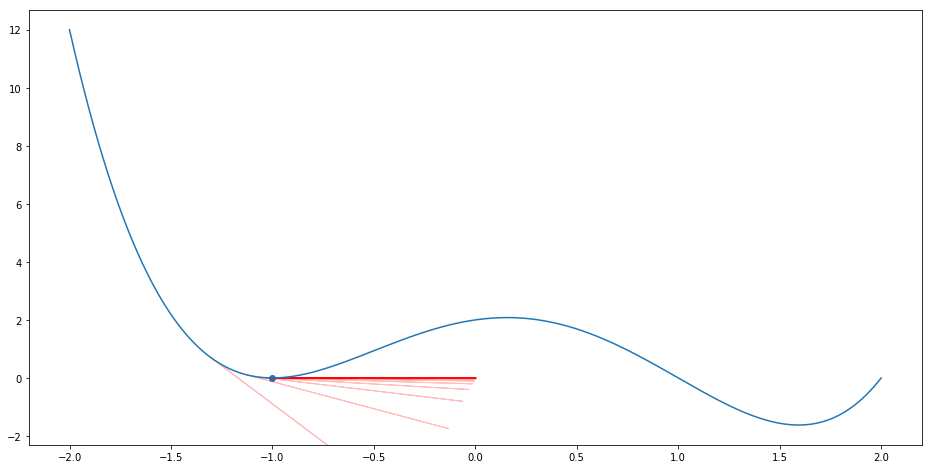

In [36]:
x_vals = optimise(100)
c_map = color=cm.autumn(x_vals[0::5])

plt.figure(figsize=(16, 8))
plt.plot(x, f(x))
for i, X in enumerate(x_vals[0::5]):
    if X is None:
        break
    
    plt.arrow(X, f(X), 1, df(X),alpha=0.25, color=c_map[i])
    
plt.scatter(x_vals[-1], f(x_vals[-1]))

In [102]:
# init two variables in the place of our variable
# must = the current value

def generate_vars(x):
    a = rnd.random(x.shape)
    b = x / a  # additive? mul?
    return a, b

def f_reparam(a, b):  # is this still the same fn!?!!?
    x = a * b
    return f(x)

df_a = egrad(f_reparam, argnum=0)
df_b = egrad(f_reparam, argnum=1)

In [103]:
a, b = generate_vars(x)
dy = df_a(a, b)

In [110]:
x = np.linspace(-2, 2, 2000)
X, Y = np.meshgrid(x, x)
Z = f_reparam(X, Y)
Z = np.clip(Z, -10, 10)

In [111]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

Text(0.5,0,'b')

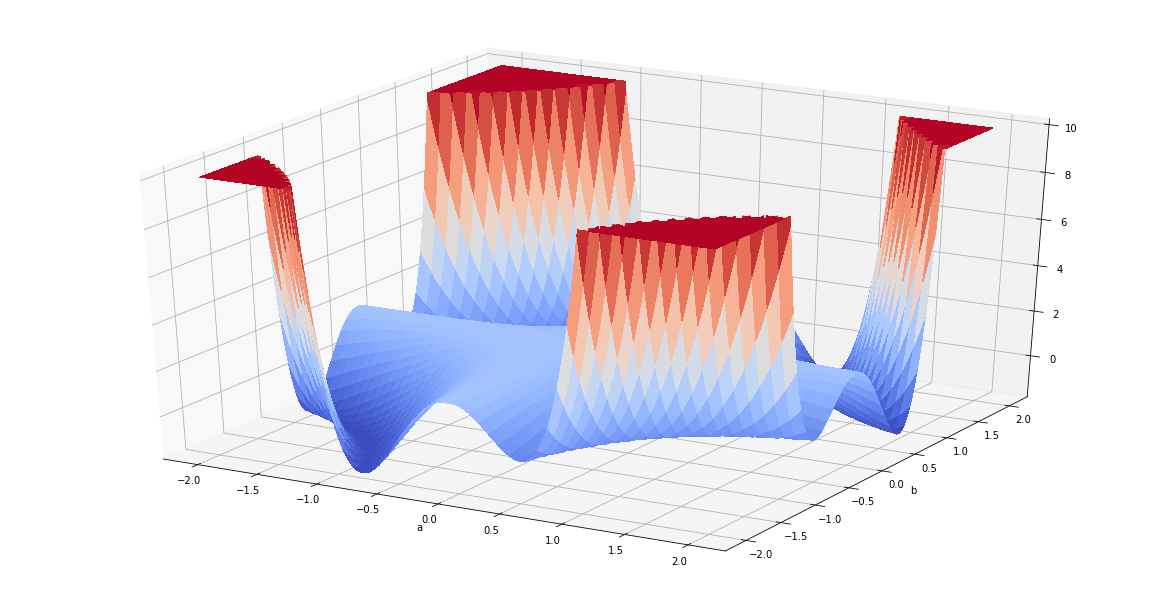

In [112]:
fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel('a')
plt.ylabel('b')

http://geoffboeing.com/2015/04/animated-3d-plots-python/

In [49]:
def optimise(iterations, lr=0.001):
    x = np.zeros((iterations, 2))
    x[0, ...] = [-2.0, 1.0]  # init at the same place x = a*b
    converged = False
    for i in range(iterations-1):
        a, b = (x[i, 0], x[i, 1])
        grad = np.array([df_a(a, b), df_b(a, b)])
        x[i+1, ...] = x[i, ...] - lr*grad
        
        if (np.abs(df_a(a, b)) < 1e-6) and (np.abs(df_b(a, b)) < 1e-6):
            break
    return x

In [50]:
x_vals = optimise(200)
x_vals = np.array([val for val in x_vals if (val!=0).all()])
print(x_vals[-1, 0]/x_vals[-1, 1])

-3.2946798420855234


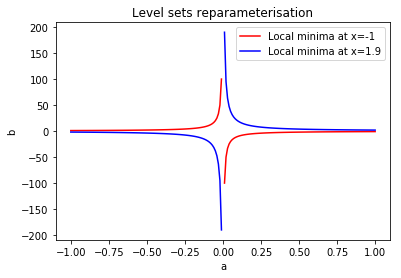

In [72]:
# now the minima become level sets.
# for all possible a,b that = some x value
a = np.linspace(-1, -1e-2, 100)
plt.plot(a, -1/a, c='r')
plt.plot(a, 1.9/a, c='b')

a = np.linspace(1e-2, 1, 100)
plt.plot(a, -1/a, c='r', label='Local minima at x=-1')
plt.plot(a, 1.9/a, c='b', label='Local minima at x=1.9')

plt.xlabel('a')
plt.ylabel('b')
plt.title('Level sets reparameterisation')
plt.legend()